* If Feature Selection techniques (Filter, Wrapper, Embedded) don't improve model performance, try Feature Extraction techniques (PCA, LDA).
* PCA is used only for Dimensionality Reduction (Unsupervised Learning)
* LDA is used for both Dimensionality Reduction and Classification (Supervised Learning)

# 1. Basic Data Understanding

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 1.1. Read Data

In [2]:
data = pd.read_csv('diabetes.csv')
data_copy = data.copy()
data = data.iloc[:,:-1] # exclude target column
features = list(data.columns.values)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


### 1.2. Summary Statistics

In [3]:
# We can see that range of values vary a lot for features
# Hence, we need to Standardize this dataset
np.round(data.describe().transpose(),decimals=2)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.0,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.0,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00


### 1.3. Frequency Distributions

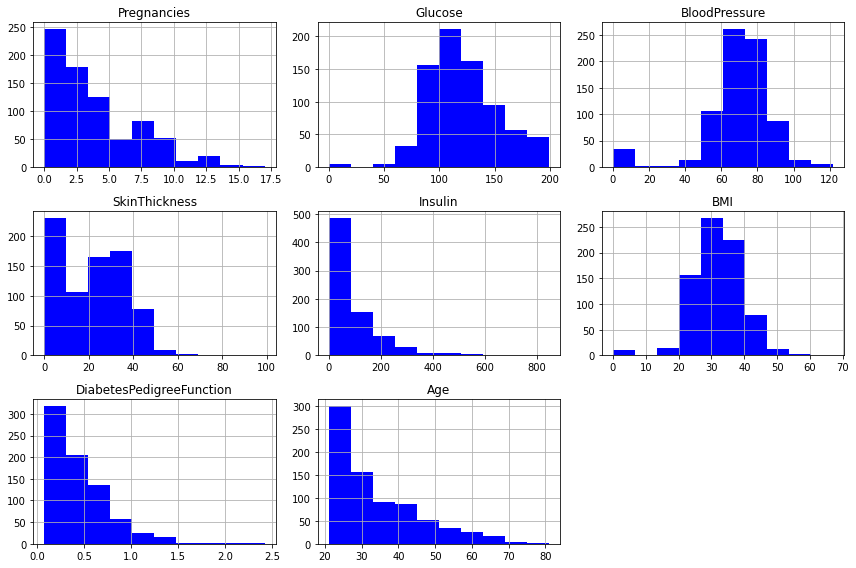

In [4]:
# Histograms
data.hist(grid=True, figsize=(12,8), color='blue')
plt.tight_layout()
plt.show()

### 1.4. Correlation Matrix

In [5]:
# Correlation matrix (data is standardized by the formula)
colnames = features
corm = data.corr().values

display(pd.DataFrame(np.round(corm,decimals=2),index=colnames,columns=colnames))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00


# 2. Check if PCA is appropriate or not

### 2.1. Method 1 - Bartlett's Sphericity Test

In [6]:
# Check for significant correlations for Dimension Reduction to be fruitful
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value, p_value = calculate_bartlett_sphericity(data)
if (p_value <0.05): print('Barlett Sphericity - Passed')
else: print('Barlett Sphericity - Failed!')

Barlett Sphericity - Passed


### 2.2. Method 2 - KMO Test

In [7]:
# Check for sampling adequacy
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(data)
print("\nKaiser-Meyer-Olkin:", kmo_model)
if (kmo_model > 0.5): print("KMO - Passed")
else: print('KMO - Failed!')


Kaiser-Meyer-Olkin: 0.5883561051209574
KMO - Passed


# 3. Standardize Data

In [8]:
# Standardized the data
from sklearn.preprocessing import StandardScaler
data_std = StandardScaler().fit_transform(data) #mean=0; var=1

# 4. Apply PCA

In [9]:
# Run the PCA Method
from sklearn.decomposition import PCA
n_components = len(features)
pca = PCA(n_components).fit(data_std)

In [10]:
# generate PC labels:
PCs=[]
for l in range(1,n_components+1):
    PCs.append("PC"+str(l))

# 5. Interpret Princliple Components (PCs)

### 5.1. Eigenvectors

In [11]:
# get the eigenvectors
eigenvectors = np.round(pca.components_.transpose(),decimals=3)
display(pd.DataFrame(eigenvectors,index=colnames,columns=PCs))

# PC1 = 0.128*Pregnancies + 0.393*Glucose + 0.360*BloodPressure ....

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Pregnancies,0.128,0.594,-0.013,0.081,-0.476,0.194,-0.589,0.118
Glucose,0.393,0.174,0.468,-0.404,0.466,0.094,-0.060,0.450
BloodPressure,0.360,0.184,-0.535,0.056,0.328,-0.634,-0.192,-0.011
SkinThickness,0.440,-0.332,-0.238,0.038,-0.488,0.010,0.282,0.566
Insulin,0.435,-0.251,0.337,-0.350,-0.347,-0.271,-0.132,-0.549
BMI,0.452,-0.101,-0.362,0.054,0.253,0.685,-0.035,-0.342
DiabetesPedigreeFunction,0.271,-0.122,0.433,0.834,0.120,-0.086,-0.086,-0.008
Age,0.198,0.621,0.075,0.071,-0.109,-0.033,0.712,-0.212


### 5.2. Loading Matrix

In [12]:
# We create Loading Matrix to interpret Principle Components
# Loading matrix can be viewed as "correlation" between (PC and features) and (between features).
# get eigenvalues to calculate the loadings
eigenvalues = pca.explained_variance_
loadings = eigenvectors * np.sqrt(eigenvalues)

display(pd.DataFrame(np.round(loadings,decimals=4),index=colnames,columns=PCs))

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Pregnancies,0.1854,0.7821,-0.0132,0.0758,-0.4159,0.1604,-0.3819,0.0751
Glucose,0.5691,0.2291,0.4752,-0.3783,0.4071,0.0777,-0.0389,0.2864
BloodPressure,0.5213,0.2423,-0.5432,0.0524,0.2866,-0.5242,-0.1245,-0.0070
SkinThickness,0.6372,-0.4371,-0.2417,0.0356,-0.4264,0.0083,0.1828,0.3602
Insulin,0.6299,-0.3305,0.3422,-0.3277,-0.3032,-0.2240,-0.0856,-0.3494
BMI,0.6546,-0.1330,-0.3676,0.0506,0.2210,0.5663,-0.0227,-0.2176
DiabetesPedigreeFunction,0.3924,-0.1606,0.4397,0.7809,0.1048,-0.0711,-0.0558,-0.0051
Age,0.2867,0.8176,0.0762,0.0665,-0.0952,-0.0273,0.4616,-0.1349


In [13]:
# Example:
# PC1 has highest correlation with SkinThickness,Insulin,BMI
# and these features are correlated with each other.

### 5.3. Loadings Plot

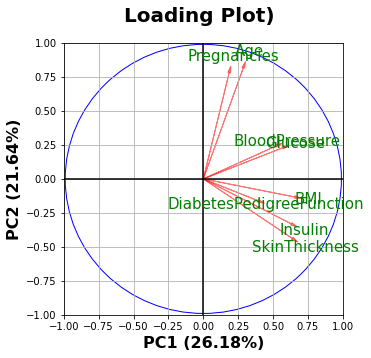

In [15]:
# Loadings Plot
# It reveals the same info as Loading Matrix
# Closer to 1 or -1 -> strong influence. Closer to 0 -> weak influence
p1=1; p2=2
coeff = loadings[:,p1-1:p2]
var_expln = np.round(pca.explained_variance_ratio_ * 100,decimals=3)

fig = plt.figure(figsize=(5,5))
plt.xlim(-1,1)
plt.ylim(-1,1)
fig.suptitle('Loading Plot)',fontsize=20,weight='bold')
plt.xlabel('PC'+str(p1)+' ('+str(var_expln[p1-1])+'%)',fontsize=16,weight='bold')
plt.ylabel('PC'+str(p2)+' ('+str(var_expln[p2-1])+'%)',fontsize=16,weight='bold')

for i in range(len(coeff[:,0])):
    plt.arrow(0,0,coeff[i,0],coeff[i,1],color='r',
              alpha=0.5,head_width=0.02, head_length=0.05)
    plt.text(coeff[i,0]*1.15,coeff[i,1]*1.15,features[i],fontsize=15,
             color='g',ha='center',va='center')

circle = plt.Circle((0, 0), 0.99,  color='b', fill=False)
ax = fig.gca(); ax.add_artist(circle)
plt.axhline(0, color='black'); plt.axvline(0, color='black')
plt.grid()
plt.show()

# 6. PC Selection

### 6.1. Method 1 - Eigenvalues & Variance

In [16]:
npc = 6 # display
print('Eigenvalues         :',np.round(eigenvalues[0:npc],decimals=3)) # Tells amount of info captured by each PC
print('% Variance Explained:',var_expln[0:npc])
print('% Cumulative)       :',np.cumsum(var_expln[0:npc]))

Eigenvalues         : [2.097 1.733 1.031 0.877 0.763 0.684]
% Variance Explained: [26.18  21.64  12.87  10.944  9.529  8.533]
% Cumulative)       : [26.18  47.82  60.69  71.634 81.163 89.696]


### 6.2. Method 2 - Pareto Chart

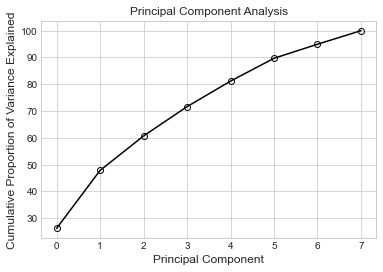

In [17]:
# pareto chart
# % Cumulative info captured with each PC
# Take till 80% or 90%. So in this case till PC3 or PC4.
# Although, according to industry standards threshold is only 65%.
plt.style.use('seaborn-whitegrid')
cumulative_var = np.cumsum(var_expln)
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance Explained",fontsize=12)
plt.show()

### 6.3. Method 3 - Scree Plot

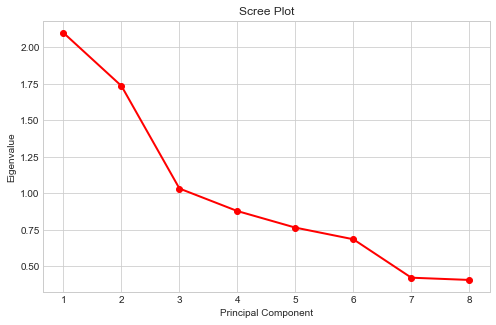

In [18]:
## scree plot
# How info captured by each PC is declining
# Take till elbow point. In this case PC3 or PC4
fig = plt.figure(figsize=(8,5))
x_axis = np.arange(n_components) + 1

plt.plot(x_axis, eigenvalues, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

### 6.4. Communalites

In [19]:
# compute the communilaties for the selected number of PC
# How much info for each feature is captured by 4 PCs.
no_pc = 4 

loadings_sq = loadings*loadings #square matrix
communality = np.sum(loadings_sq[:,0:no_pc],axis=1).tolist()
print(pd.DataFrame(communality,index=colnames))

                                 0
Pregnancies               0.651915
Glucose                   0.745273
BloodPressure             0.628313
SkinThickness             0.656735
Insulin                   0.730515
BMI                       0.583790
DiabetesPedigreeFunction  0.982884
Age                       0.760930


# 7. Next Steps

### 7.1. Component Scores

In [29]:
# Print out the Component Scores
PC_scores = pca.fit_transform(data_std) # PC scores for downstream analytics

scores = pd.DataFrame(PC_scores[:,0:no_pc],columns=PCs[0:no_pc])
scores.head(10)

,PC1,PC2,PC3,PC4
0,1.068503,1.234895,0.095930,0.496990
1,-1.121683,-0.733852,-0.712938,0.285056
2,-0.396477,1.595876,1.760678,-0.070395
3,-1.115781,-1.271241,-0.663729,-0.579123
4,2.359334,-2.184819,2.963107,4.033099
5,-1.435751,0.835577,-0.220332,-0.447845
6,-0.930176,-1.107940,-0.536578,-0.144660
7,-2.149806,0.855902,1.254642,-0.638269
8,3.297925,-0.242155,1.870861,-3.034595
9,-1.839850,3.206661,0.660732,-0.377021


### 7.2. New Dataset

In [30]:
PCA_df = pd.concat([scores,data_copy['Outcome']],axis=1)
PCA_df.head()

,PC1,PC2,PC3,PC4,Outcome
0,1.068503,1.234895,0.095930,0.496990,1
1,-1.121683,-0.733852,-0.712938,0.285056,0
2,-0.396477,1.595876,1.760678,-0.070395,1
3,-1.115781,-1.271241,-0.663729,-0.579123,0
4,2.359334,-2.184819,2.963107,4.033099,1


In [37]:
PCA_df.to_csv('PCA_diabetes.csv',index=False)

### 7.3. Score Plot

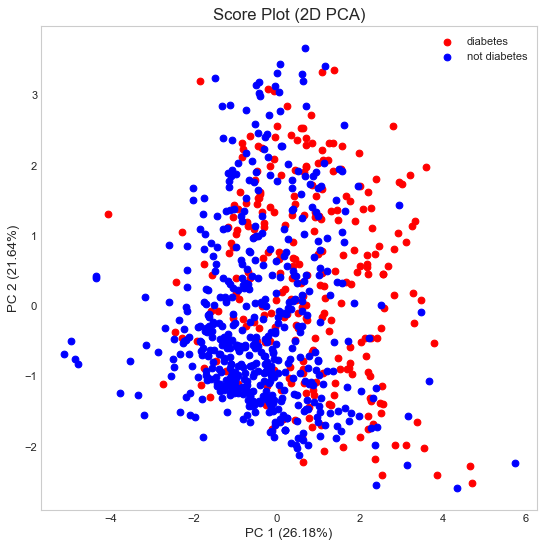

In [36]:
# Score Plot - scatterplot of new dataset with PC1 and PC2 
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

classes = [1, 0]
colors = ['r', 'b']
for clas, color in zip(classes, colors):
    plt.scatter(scores.loc[PCA_df['Outcome'] == clas, 'PC1'], PCA_df.loc[PCA_df['Outcome'] == clas, 'PC2'], c = color)
    
# plt.axhline(0, color='black'); plt.axvline(0, color='black')    

plt.xlabel('PC 1 ('+str(var_expln[0])+'%)', fontsize = 12)
plt.ylabel('PC 2 ('+str(var_expln[1])+'%)', fontsize = 12)
plt.title('Score Plot (2D PCA)', fontsize = 15)
plt.legend(['diabetes', 'not diabetes'])
plt.grid()

# My Observations

### 1. For Original Dataset (Day 1)

|                     | Train Accuracy | Test Accuracy | AUC score |
|---------------------|----------------|---------------|-----------|
| Logistic Regression | 0.771           | 0.727          | 0.821      |
| KNN                 | 0.781           | 0.762          | 0.804      |
| Naive Bayes         | 0.779           | 0.738          | 0.796      |

### 2. For New Dataset with 4 PCs

|                     | Train Accuracy | Test Accuracy | AUC score |
|---------------------|----------------|---------------|-----------|
| Logistic Regression | 0.732          | 0.707         | 0.770     |
| KNN                 | 0.785          | 0.719         | 0.752     |
| Naive Bayes         | 0.738          | 0.720         | 0.758     |

1. For KNN, training accuracy increased by 0.4% after PCA.
2. The testing performance for all algorithms decreased after PCA.

**Note:** I checked model performances with 3PCs and 5PCs as well. But there wasn't significant difference in their performance from 4PCs. <br> To sum up, Models performed better with Original dataset than with 3PCs,4PCs,5PCs dataset.